# Quiz 2 - Image Processing

**Brian**

**Eugenio Pacceli**

**Renato Oliveira**

First task consisted of creating three masks with shapes (3x3), (5x5) and (7x7) based on Butterworth filter.

It was also required to use filter orders n of {1,4} and cut-off frequencies D0 = {10,1}

Image size should be width=640 x height=480

Following the Butterworth formula, below we defined a function to calculate the distance D(u,v) from center of image with dimensions (w,h)

In [4]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image is height: 480, width: 640

#M:u:x:col:width
#N:v:y:row:height
m = 3
n = 3

In [5]:
#Calculate (u,v) distance from center of image
def getDValue(u,v,w,h):
    return np.sqrt((u - (w/2.0))**2 + (v - (h/2.0))**2)

Afterwards, we created a function calculate each of the elements of matrix H, the Butterworth filter.

In [6]:
#Calculate element of Butterworth filter in matrix H given (u,v) pair,
#cut-off frequency d0, order term n, width w and height h
def getHValue(u,v,d0,n,w,h):
    denom = 1.0 + ((getDValue(u,v,w,h)/d0)**(2*n))
    return 1.0/denom

Below we have a function to create matrix H that define a Butterworth filter for an image of (w,h) dimensions

Each element cell, has 2 values, one for the real part and the other for the imaginary part.

This follows the openCV standard for this kind of data structure

In [7]:
#Create a Butterworth filter as matrix H given image dimensions (w,h), cutoff frequency d0, order n, width w and
#height h. Calculate matrix H following openCV's standards, that is, with shape (h,w,2).
#Each cell has 2 float values, the real part and the imaginary part
def makeMatrixHCV2(w,h,d0,n):

    matH = np.ones((h,w,2),dtype=np.float32)

    for i in range(h):
        for j in range(w):
            matH[i,j] = getHValue(i,j,d0,n,w,h)

    return matH


As of matrix C, each of its rows has m\*n elements corresponding to the exponential term in the Fourier transform. Each line correspond to a (u,v) pair of the H_hat vector that has N² elements and iterates though 

In [8]:

#Calculate a row for the matrix C
#Matrix C has format N^2 x n^2.
#For example, if we want a kernel ^H with shape 3x3 to aproximate the Butterworth filter H with shape (N=480, M=640) we will have matrix C with shape (N^2,n^2)
#So, every line of matrix C has n^2 elements for each (u,v) pair of matrix ^H
def getCRow(M,N,m,n,u,v):
    return [np.exp(-2j*np.pi*(((x*u)/M) + ((y*v)/N))) for x in xrange(m) for y in xrange(n)]


The following function calculate each of (u,v) lines of the matrix C

In [9]:
#Build matrix C by calculating its lines for each (u,v) pair
def makeMatrixC(M,N,m,n):
    matC = list()
    for u in xrange(N):
        for v in xrange(N):
            matC.append(getCRow(M,N,m,n,u,v))
    return np.array(matC,dtype=np.complex)

Then, the function below apply the Butterworth filter to an image of dimensions (480,640) and create a matrix H of this filter with the same dimensions

In [10]:
#Apply Butterworth filter on an image with dimensions (h=480, w=640)
#Follows openCV's standard in that every matrix element is double valued with an real part and a imaginary part
def calcCV2():
    img = cv2.imread("Lenna.png",0)
    img_dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    img_shift = np.fft.fftshift(img_dft)
    matH = makeMatrixHCV2(640,480,10,1) #d0={1,10}, n={1,4}

    img_shift_m = img_shift * matH

    img_ishift = np.fft.ifftshift(img_shift_m)
    img_back = cv2.idft(img_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.imshow(img_back,cmap="gray")
    plt.show()
    #return matH

Now we create the smaller kernel by applying the pseudo-inverse of matrix C to the matrix H

In [11]:
def createNewKernel(m,n):
    matH = makeMatrixHCV2(640,480,10,1)
    matC = makeMatrixC(640,480,m,n)
    matH_f = matH.flatten()
    matH_f = matH_f[:230400]
    matH_f = matH_f.reshape((-1,1))
    matC_t = np.linalg.pinv(matC)
    vec_h = matC_t.dot(matH_f)

    mat_h = vec_h.reshape((3,3))

    img = cv2.imread("Lenna.png",0)
    img2 = cv2.filter2D(np.float32(img),-1,np.abs(mat_h))
    plt.imshow(img2,cmap="gray")

Execute all the functions

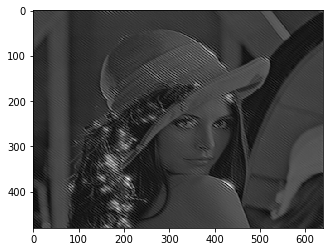

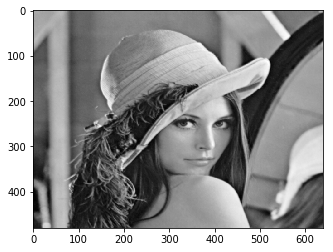

In [12]:
calcCV2()
createNewKernel(3,3)